__Solow Model__
Karl Harmenberg, Feb 2019

This notebook introduces the Solow model, which in discrete time is given by

$L_{t+1} = (1+n)L_t$

$A_{t+1} = (1+g)A_t$

$K_{t+1} = sF(K_t, A_tL_t) + (1-\delta)K_t$

First, we specify $F$:

In [2]:
alpha = 0.3
def F(K, AL):
    return K**alpha*AL**(1-alpha)

Then we pick some values for the growth rates $g$ and $n$, as well as a savings rate $s$ and a depreciation rate $\delta$:

In [3]:
n = 0.01
g = 0.02
s = 0.2
delta = 0.1

Now, we simulate the economy for a couple of years, starting with $L=1.0$, $A=1.0$ and $K = 1.0$.

In [4]:
L = 1.0
A = 1.0
K = 1.0

for year in range(10):
    Lnew = (1+n)*L
    Anew = (1+g)*A
    Knew = s*F(K, A*L)+(1-delta)*K

    print "Year=", year
    print "Lnew=", Lnew
    print "Anew=", Anew
    print "Knew=", Knew
    print "-------"
    
    L = Lnew
    A = Anew
    K = Knew

Year= 0
Lnew= 1.01
Anew= 1.02
Knew= 1.1
-------
Year= 1
Lnew= 1.0201
Anew= 1.0404
Knew= 1.20013233338
-------
Year= 2
Lnew= 1.030301
Anew= 1.061208
Knew= 1.30035539909
-------
Year= 3
Lnew= 1.04060401
Anew= 1.08243216
Knew= 1.40066754892
-------
Year= 4
Lnew= 1.0510100501
Anew= 1.1040808032
Knew= 1.50109844746
-------
Year= 5
Lnew= 1.0615201506
Anew= 1.12616241926
Knew= 1.60170235559
-------
Year= 6
Lnew= 1.07213535211
Anew= 1.14868566765
Knew= 1.70255286885
-------
Year= 7
Lnew= 1.08285670563
Anew= 1.171659381
Knew= 1.80373877214
-------
Year= 8
Lnew= 1.09368527268
Anew= 1.19509256862
Knew= 1.90536076173
-------
Year= 9
Lnew= 1.10462212541
Anew= 1.21899441999
Knew= 2.00752884756
-------


Ok, that was kind of interesting, but let's track how GDP per capita evolves.

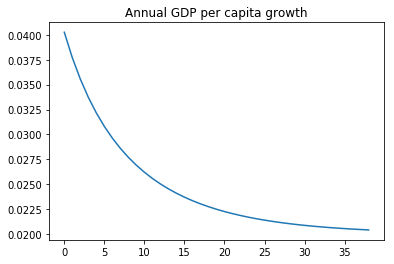

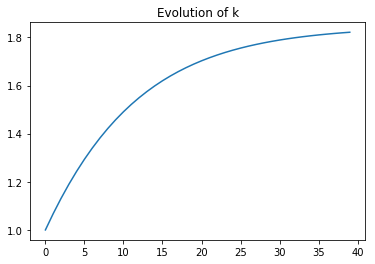

In [5]:
import numpy as np
import pylab as pl

L = 1.0
A = 1.0
K = 1.0
Years = 40

gdp_list = np.zeros(Years)
k_list = np.zeros(Years)

for year in range(Years):
    Lnew = (1+n)*L
    Anew = (1+g)*A
    Knew = s*F(K, A*L)+(1-delta)*K
    
    gdp_list[year] = F(K, A*L)/L
    k_list[year] = K/(A*L)
    
    L = Lnew
    A = Anew
    K = Knew

%matplotlib inline

annual_growth = gdp_list[1:]/gdp_list[:-1]-1

pl.plot(annual_growth)
pl.title("Annual GDP per capita growth")
pl.show()
pl.title("Evolution of k")
pl.plot(k_list)
pl.show()


The growth rate is high initially because the capital stock was low. Eventually, the economy converges to the balanced growth path and has a two-percent GDP per capita growth. What do the figures look like if we set $K=5.0$?